In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
housing = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Conculsion

1. all are numerical except ocean_proximity
2. total_bedrooms has null values

In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


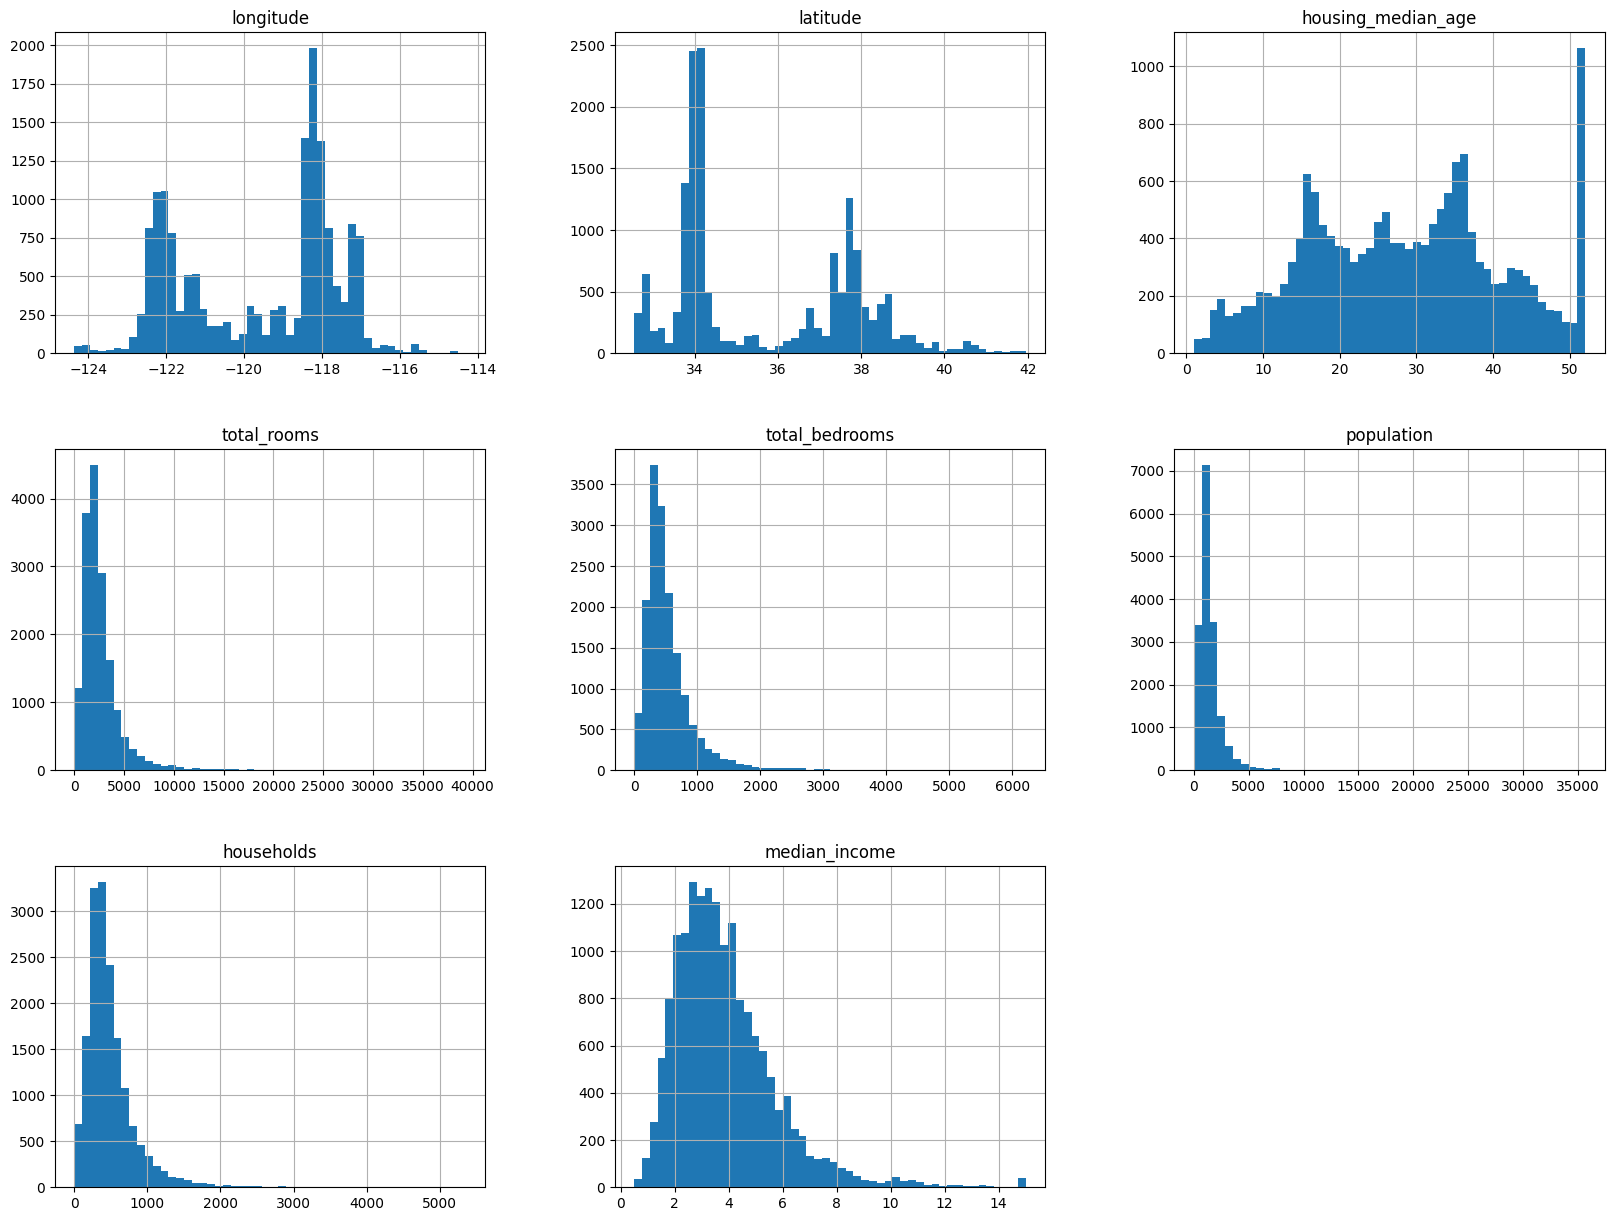

In [163]:
#plot a histogram
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

# Create Test Set

In [8]:
#create test and train set
from sklearn.model_selection import train_test_split

In [9]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
print(len(train_set))
print(len(test_set))

16512
4128


In [11]:
housing["median_income"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64


* 0-1.5 --> 1
* 1.5 - 3 --> 2
* 3 - 4.5 --> 3
* 4.5-6 --> 4
* 6 --> 5


In [12]:
pd.cut(housing['median_income'], bins =[0,1.5,3,4.5,6., np.inf], labels = [1,2,3,4,5])

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [13]:
housing['income_cat']=pd.cut(housing['median_income'], bins =[0,1.5,3,4.5,6., np.inf], labels = [1,2,3,4,5])

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [15]:
housing.shape


(20640, 11)

<Axes: xlabel='income_cat'>

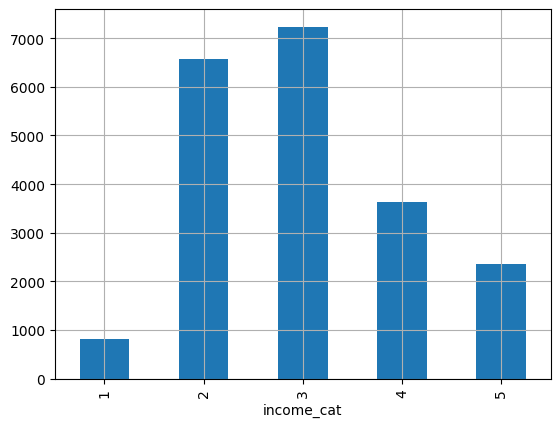

In [16]:
housing['income_cat'].value_counts().sort_index().plot.bar(grid=True)

In [17]:
strat_train ,strat_test = train_test_split(housing, test_size=0.2, random_state = 42, stratify=housing['income_cat'])

In [18]:
strat_train['income_cat'].value_counts()

income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64

In [19]:
strat_test['income_cat'].value_counts()

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

In [20]:
strat_train.drop("income_cat", axis=1, inplace=True)

In [21]:
strat_test.drop("income_cat", axis=1, inplace=True)


In [22]:
strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


# visuallisation

In [23]:
housing = strat_train.copy()

In [24]:
housing.shape

(16512, 10)

In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


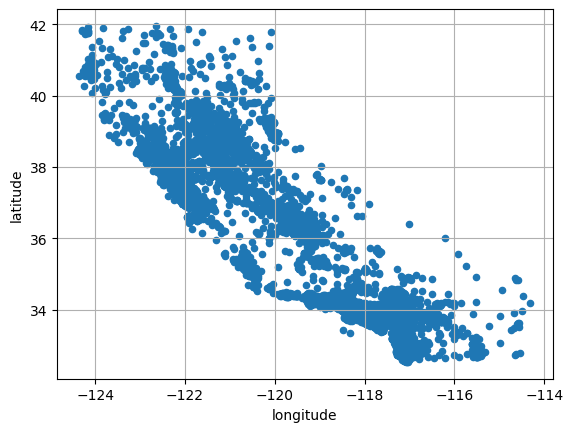

In [26]:
housing.plot(kind="scatter", x = "longitude", y="latitude", grid=True)
plt.show()

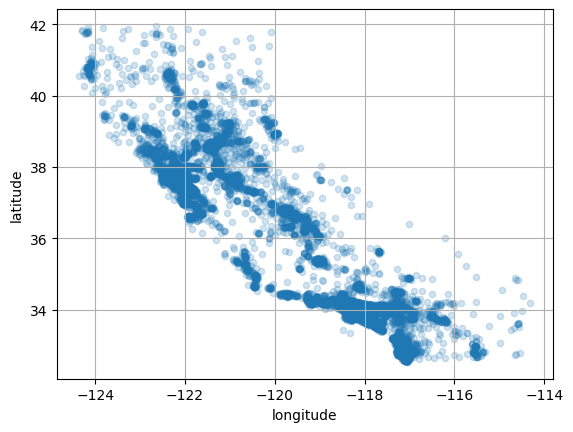

In [27]:
housing.plot(kind="scatter", x = "longitude", y="latitude",alpha=0.2, grid=True)
plt.show()

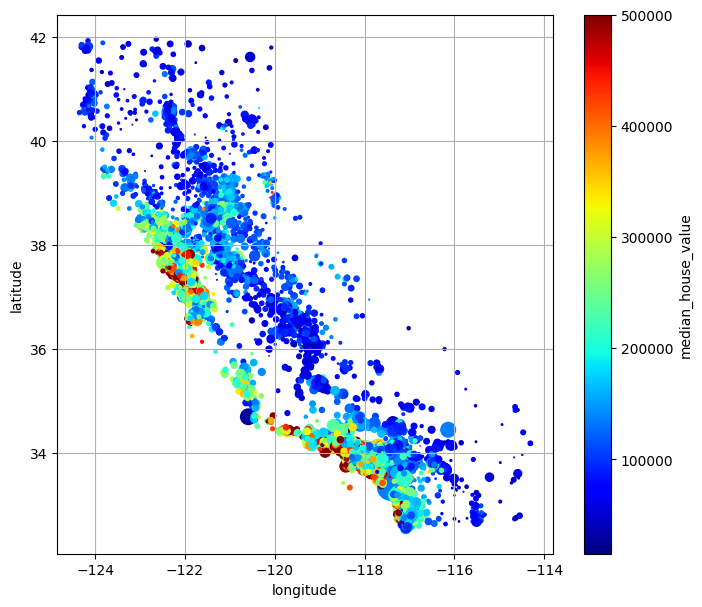

In [28]:
housing.plot(kind="scatter",
             x = "longitude",
             y="latitude",
             s=housing['population']/100,
             c='median_house_value',
             cmap='jet',
             figsize=(8,7),
             grid=True)
plt.show()

## Correlation

In [29]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [31]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['housing_median_age', 'total_rooms',
        'median_income',
       'median_house_value']

scatter_matrix(housing[attributes], figsize=(12,10))

array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_value', ylabel='total_rooms'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='media

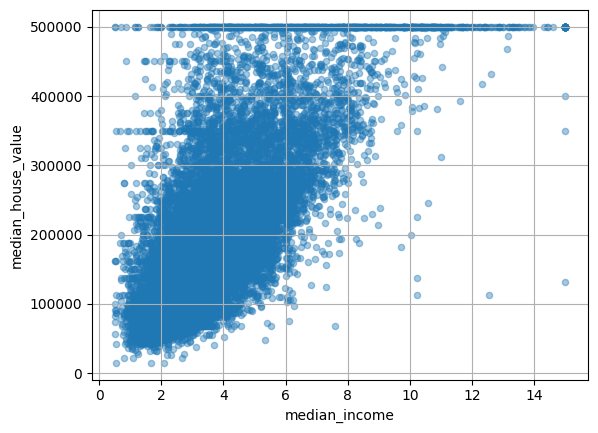

In [33]:
housing.plot(kind="scatter", x = "median_income", y="median_house_value",alpha=0.4, grid=True)
plt.show()

In [34]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [35]:
# no of rooms per house
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
#number of bedrooms
housing['bedroom_ratio'] = housing['total_bedrooms']/housing['total_rooms']
# population per house
housing['people_per_house'] = housing['population']/housing['households']

In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [37]:
corr_matrix = housing.corr(numeric_only=True)

In [38]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedroom_ratio        -0.259952
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='rooms_per_house', ylabel='median_house_value'>,
        <Axes: xlabel='bedroom_ratio', ylabel='median_house_value'>,
        <Axes: xlabel='people_per_house', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='rooms_per_house'>,
        <Axes: xlabel='rooms_per_house', ylabel='rooms_per_house'>,
        <Axes: xlabel='bedroom_ratio', ylabel='rooms_per_house'>,
        <Axes: xlabel='people_per_house', ylabel='rooms_per_house'>],
       [<Axes: xlabel='median_house_value', ylabel='bedroom_ratio'>,
        <Axes: xlabel='rooms_per_house', ylabel='bedroom_ratio'>,
        <Axes: xlabel='bedroom_ratio', ylabel='bedroom_ratio'>,
        <Axes: xlabel='people_per_house', ylabel='bedroom_ratio'>],
       [<Axes: xlabel='median_house_value', ylabel='people_per_house'>,
        <Axes: xlabel='rooms_per_house', ylabel='people_per_house'>,
        <Axes: xlabel='bedroom

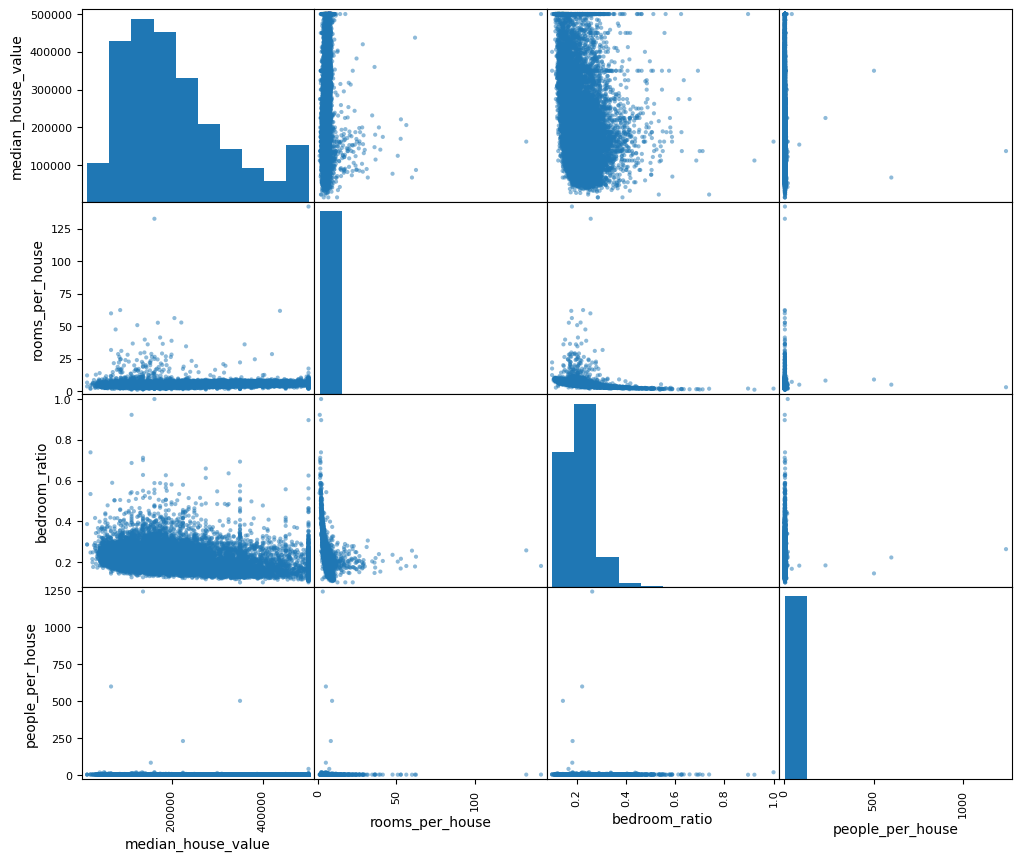

In [39]:
attributes = ['median_house_value', 'rooms_per_house','bedroom_ratio','people_per_house']

scatter_matrix(housing[attributes], figsize=(12,10))

# Data Cleaning

In [40]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  rooms_per_house     16512 non-null  float64
 11  bedroom_ratio       16354 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [41]:
housing['total_bedrooms'].isnull().sum()

158

In [42]:
housing[housing['total_bedrooms'].isnull()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,85000.0,NEAR BAY,4.707668,NaN,1.317891
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,177000.0,<1H OCEAN,4.537074,NaN,3.947896
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,146500.0,<1H OCEAN,5.826196,NaN,2.403023
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,214800.0,<1H OCEAN,4.448980,NaN,2.840136
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,500001.0,NEAR OCEAN,6.835417,NaN,2.385417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND,5.460474,NaN,3.168972
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,405600.0,<1H OCEAN,4.881783,NaN,2.164729
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,239400.0,<1H OCEAN,6.923129,NaN,3.341875
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,297900.0,NEAR OCEAN,2.922576,NaN,2.262199


In [43]:
housing = strat_train.drop("median_house_value", axis=1)

In [44]:
housing_labels = strat_train['median_house_value'].copy()

In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [46]:
housing_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [47]:
housing['total_bedrooms'].isnull().sum()

158

In [48]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

1. delete the entire feature
2. delete the null rows
3. fill the missin values with 0, mean, median etc. ===> *imputation*

In [49]:
housing.dropna(subset=["total_bedrooms"]).info() #option 1


<class 'pandas.core.frame.DataFrame'>
Index: 16354 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   ocean_proximity     16354 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [50]:
housing.drop("total_bedrooms", axis = 1)  #option 2


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [51]:
from sklearn.impute import SimpleImputer

In [52]:
imputer = SimpleImputer(strategy="median")
imputer

SimpleImputer(strategy='median')

In [53]:
housing_num = housing.select_dtypes(include=np.number)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [54]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [55]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [56]:
X = imputer.transform(housing_num)

In [57]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [58]:
# lets convert it into dataframe

housing_trained = pd.DataFrame(X, columns = housing_num.columns, index= housing_num.index)
housing_trained.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [59]:
housing_trained.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


## Categorical Data

In [60]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [61]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

#### ORidnal Encoding

In [62]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
ord_encoder

OrdinalEncoder()

In [63]:
housing_cat_encoder = ord_encoder.fit_transform(housing_cat)
housing_cat_encoder[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [64]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [65]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [66]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [67]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [68]:
housing_trained.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


# min max scaler


In [69]:
from sklearn.preprocessing import MinMaxScaler


In [70]:
min_max_scaler = MinMaxScaler(feature_range = (-1,1))
min_max_scaler

MinMaxScaler(feature_range=(-1, 1))

In [71]:
housing_min_max_scaled_num = min_max_scaler.fit_transform(housing_num)
housing_min_max_scaled_num

array([[-0.42430279,  0.27098831,  0.09803922, ..., -0.87477228,
        -0.73711725, -0.76914801],
       [ 0.41832669, -0.88310308, -0.76470588, ..., -0.88721657,
        -0.71396565, -0.19485248],
       [ 0.05776892, -0.39851222,  0.68627451, ..., -0.96277923,
        -0.88872293, -0.67240452],
       ...,
       [-0.6752988 ,  0.25398512,  0.84313725, ..., -0.9744948 ,
        -0.93651979, -0.63037751],
       [-0.67131474,  0.22635494, -0.49019608, ..., -0.93245326,
        -0.81366692, -0.49014496],
       [-0.55976096,  0.57917109,  0.01960784, ..., -0.96513355,
        -0.92718447, -0.63697052]])

In [72]:
# Standardization
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()


In [73]:
houisng_std_scaled_num = std_scaler.fit_transform(housing_num)
houisng_std_scaled_num

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

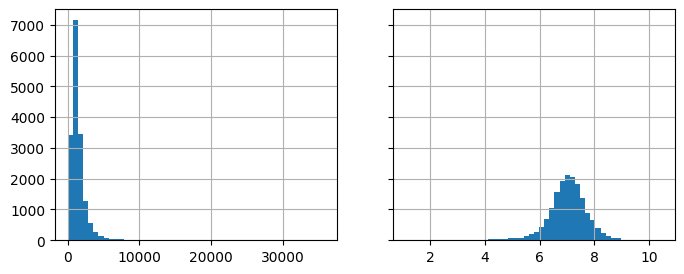

In [74]:
fig,axs = plt.subplots(1,2, figsize=(8,3), sharey =True)
housing['population'].hist(ax=axs[0], bins=50)
housing['population'].apply(np.log).hist(ax=axs[1], bins=50)

plt.show()

In [75]:
housing['population']

12655    2237.0
15502    2015.0
2908      667.0
14053     898.0
20496    1837.0
          ...  
15174    2026.0
12661    4769.0
19263     458.0
19140    1208.0
19773     625.0
Name: population, Length: 16512, dtype: float64

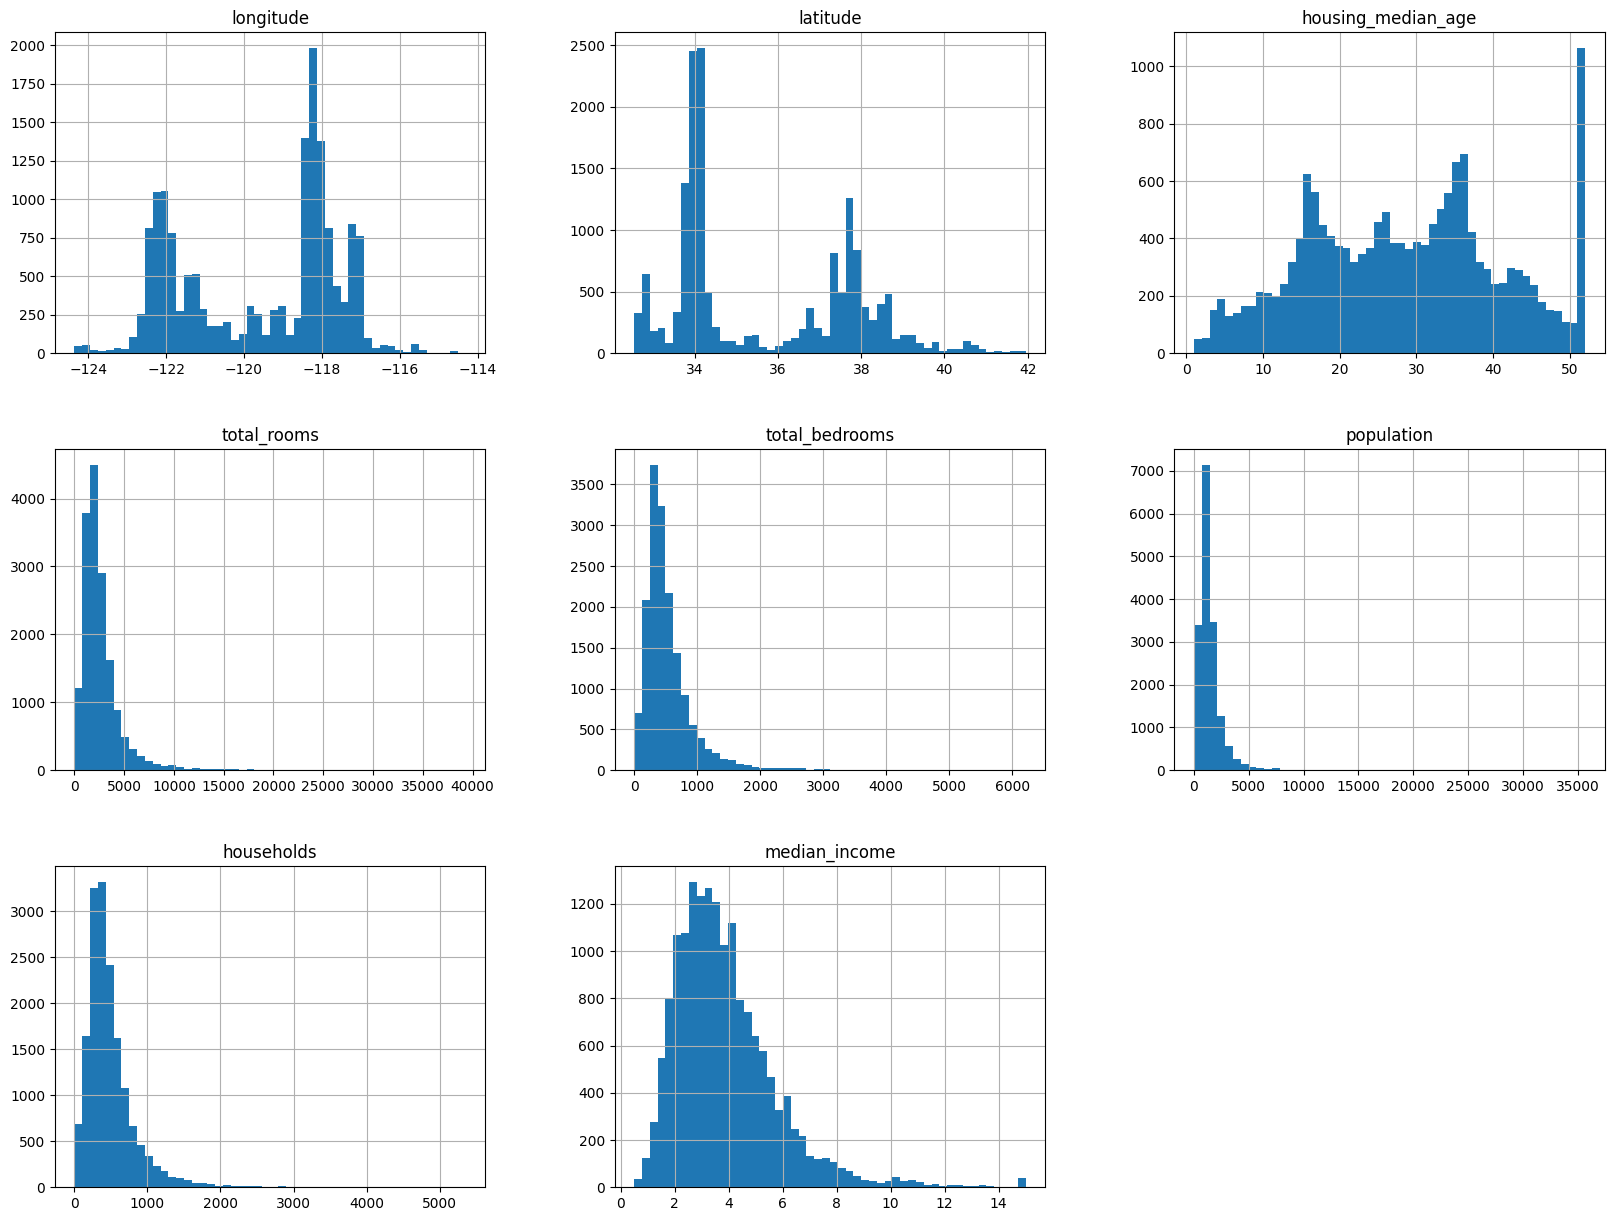

In [76]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

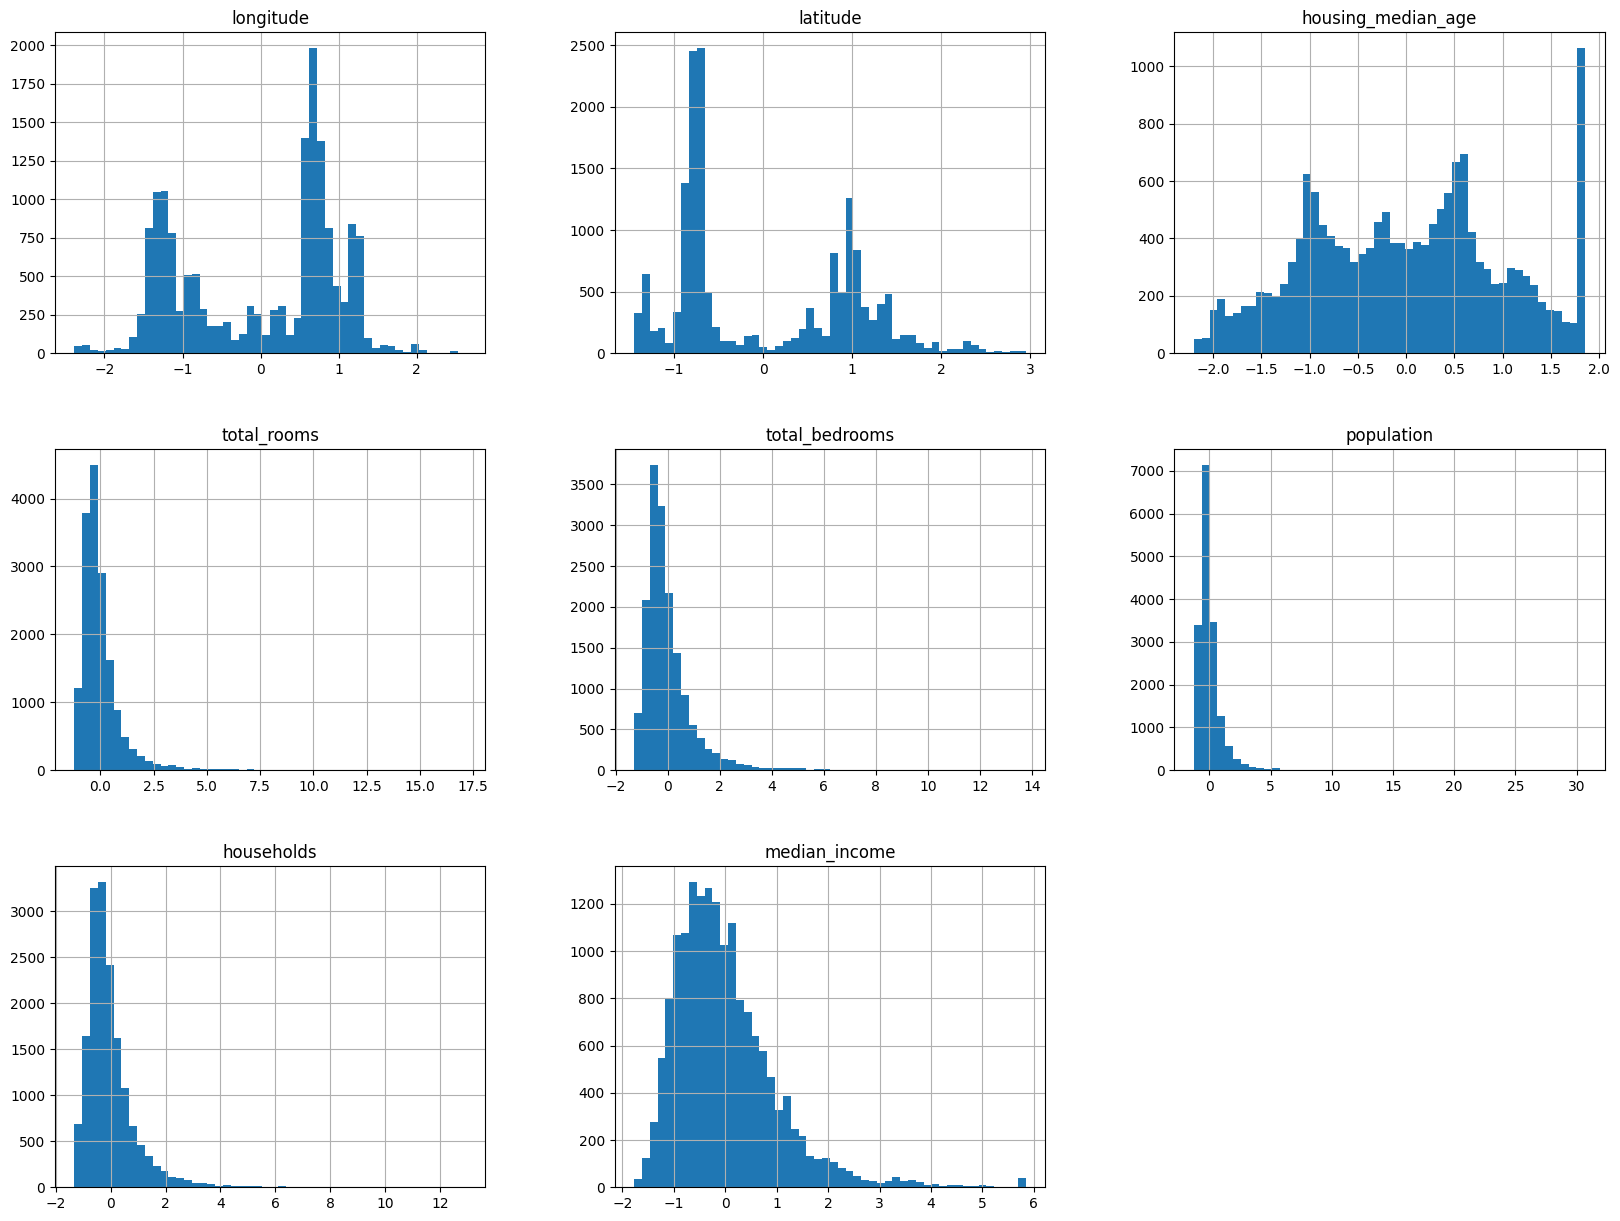

In [77]:
housing_num_stdScaled_df = pd.DataFrame(houisng_std_scaled_num, columns=housing_num.columns, 
                                        index=housing_num.index)
housing_num_stdScaled_df

housing_num_stdScaled_df.hist(bins=50, figsize=(20,15))
plt.show()


In [78]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('standardize', StandardScaler())
])

In [79]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [80]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [81]:
housing_num_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [82]:
num_pipeline.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [83]:
housing_num_prepared_df = pd.DataFrame(housing_num_prepared, 
                                       columns=num_pipeline.get_feature_names_out(), 
                                       index=housing_num.index)
housing_num_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752


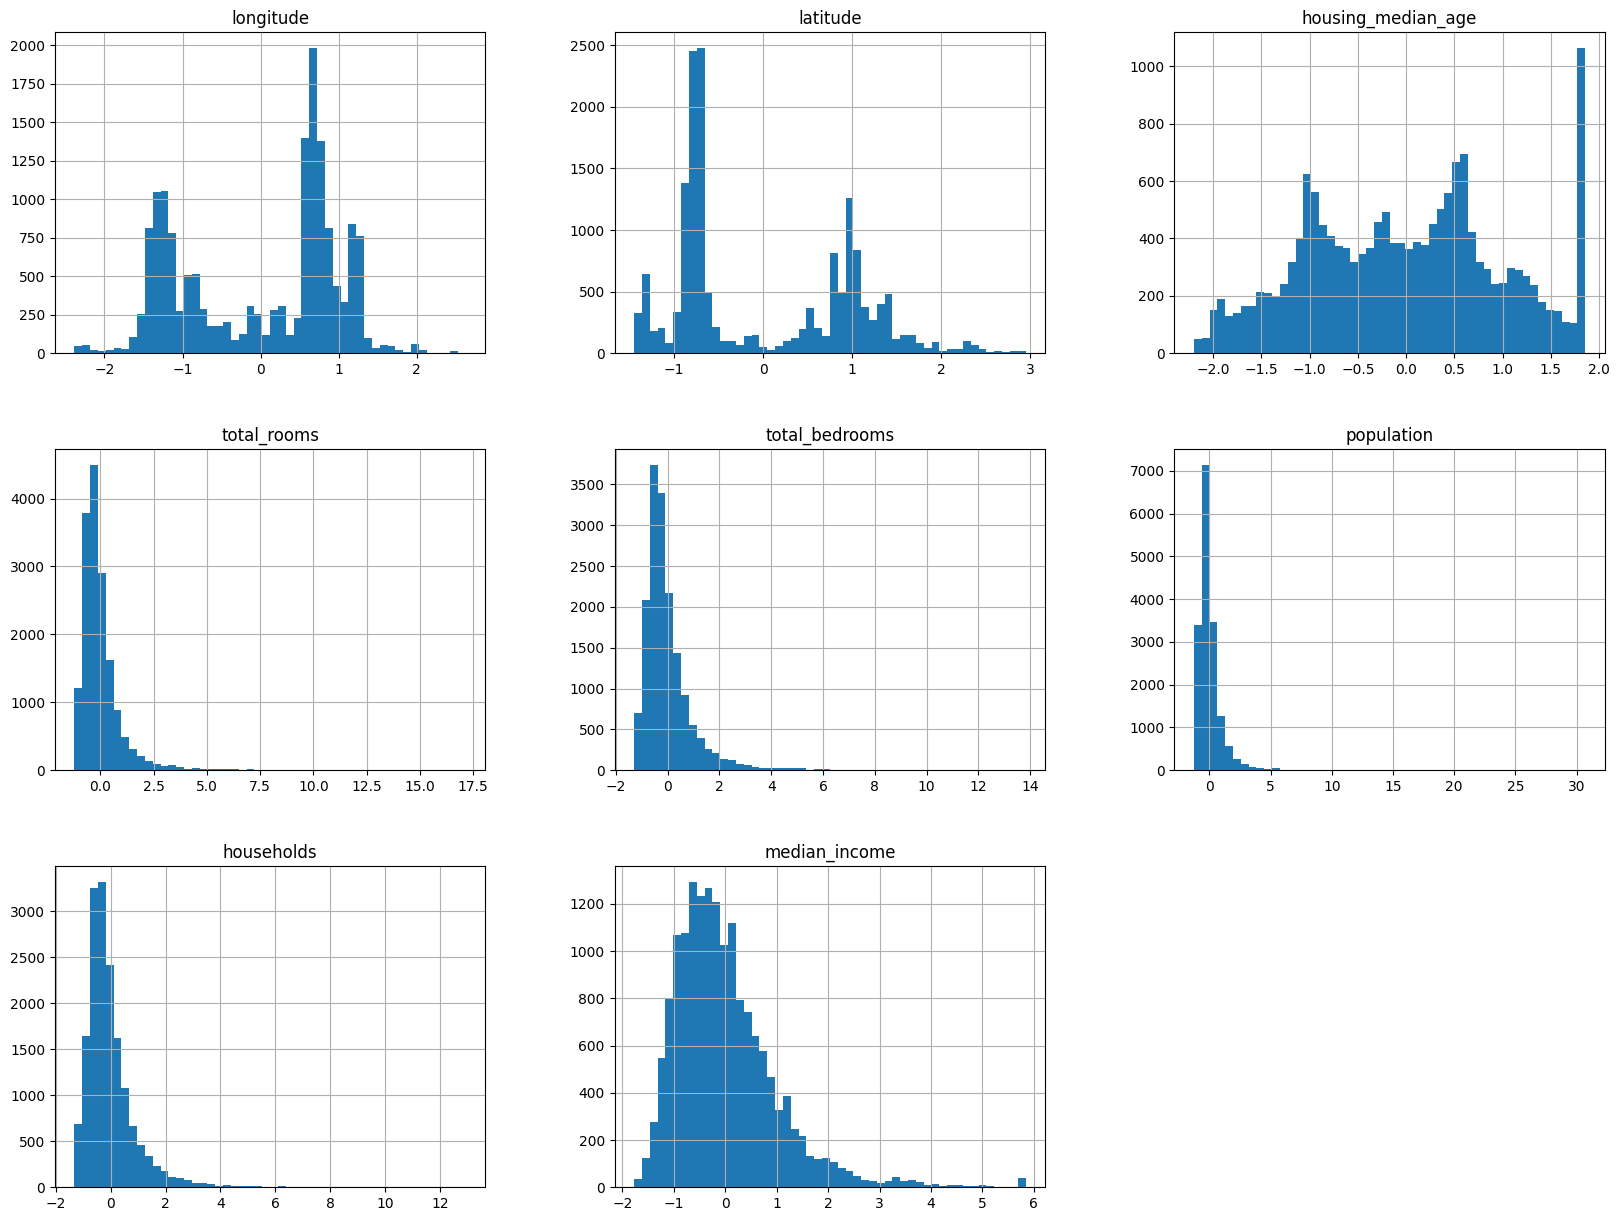

In [84]:
housing_num_prepared_df.hist(bins=50, figsize=(20,15))
plt.show()

In [85]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [86]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [87]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [88]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

Pipeline - 

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attributes = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
cat_attributes = ['ocean_proximity']

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('standardize', StandardScaler())
])
cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown = 'ignore')
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
  ("cat", cat_pipeline, cat_attributes)
])

In [90]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [91]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.0,0.0,0.0,0.0,0.0


In [92]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [93]:
preprocessing.fit_transform(housing)


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# PIpeline for Feature ENgineering

In [94]:
def column_ratio(X):
    return X[:, [0]] /X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    """TO give the feature names out"""
    return ['ratio']
    
from sklearn.preprocessing import FunctionTransformer

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out = ratio_name),
        StandardScaler()
    )
    
    
    

In [95]:
# from sklearn.metrics.pairwise import ClusterSimilarity
from sklearn.preprocessing import FunctionTransformer

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

# cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)


preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "households", "population", "median_income"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
                remainder=default_num_pipeline                  )

In [96]:
log_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('functiontransformer',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<ufunc 'log'>)),
                ('standardscaler', StandardScaler())])

In [97]:
# # no of rooms per house
# housing['rooms_per_house'] = housing['total_rooms']/housing['households']
# #number of bedrooms
# housing['bedroom_ratio'] = housing['total_bedrooms']/housing['total_rooms']
# # population per house
# housing['people_per_house'] = housing['population']/housing['households']

In [98]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7a9e2fcf9bd0>,
                                                                      func=<function column_ratio...
                                                                      func=<ufunc 'log'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['total_bedrooms', 'total_rooms', 'households',
                                  'population', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a9e2fcf20e0>)])

In [99]:
housing_prepared = preprocessing.fit_transform(housing)

In [100]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.121122,0.017395,0.006223,0.873403,0.852032,0.797843,0.938249,-0.998832,0.0,1.0,0.0,0.0,0.0,-0.941350,1.347438,0.027564
1,-0.810867,0.569256,-0.040811,0.970407,1.277433,0.913214,0.796538,1.277742,0.0,0.0,0.0,0.0,1.0,1.171782,-1.192440,-1.722018
2,-0.338273,-0.018024,-0.075371,-0.430559,-0.317644,-0.375177,-0.702499,-0.403837,0.0,1.0,0.0,0.0,0.0,0.267581,-0.125972,1.220460
3,0.961205,-0.595140,-0.106803,0.281063,-0.118663,0.277558,-0.299288,-0.947769,0.0,0.0,0.0,0.0,1.0,1.221738,-1.351474,-0.370069
4,-0.474513,0.251241,0.006109,0.583337,0.730040,0.528397,0.671139,0.547635,1.0,0.0,0.0,0.0,0.0,0.437431,-0.635818,-0.131489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.443846,0.466353,-0.092580,1.473719,1.579483,1.276380,0.803919,0.811447,1.0,0.0,0.0,0.0,0.0,1.251711,-1.220505,-1.165333
16508,-0.516065,0.050362,0.023024,1.672897,1.807457,1.753694,1.964650,-0.449539,0.0,1.0,0.0,0.0,0.0,-0.921368,1.342761,-1.085806
16509,0.322869,-0.509240,-0.037436,-1.293050,-1.427119,-1.137635,-1.212202,-0.189525,1.0,0.0,0.0,0.0,0.0,-1.570794,1.310018,1.538566
16510,-0.457023,0.328149,-0.059156,0.434515,0.577261,0.327708,0.102799,0.400730,1.0,0.0,0.0,0.0,0.0,-1.560803,1.249211,-1.165333


In [101]:
housing_prepared.shape

(16512, 16)

In [102]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__households', 'log__population',
       'log__median_income', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__longitude', 'remainder__latitude',
       'remainder__housing_median_age'], dtype=object)

In [103]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [104]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


# Model Training
### Linear Regression 

In [105]:
from sklearn.linear_model import LinearRegression

# linreg = LinearRegression()

In [106]:

linreg = make_pipeline(preprocessing, LinearRegression())
linreg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a9...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a9e2fcf20e0>)])),
                ('linearregression', LinearRegression())])

In [107]:
pd.DataFrame(housing_labels)

,median_house_value
12655,72100.0
15502,279600.0
2908,82700.0
14053,112500.0
20496,238300.0
...,...
15174,268500.0
12661,90400.0
19263,140400.0
19140,258100.0


In [108]:
linreg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a9...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a9e2fcf20e0>)])),
                ('linearregression', LinearRegression())])

In [109]:
housingPred =linreg.predict(housing)
housingPred[:5]

array([ 75904.57579571, 296127.6348477 , 183420.65391634, 206653.59503525,
       257587.02753258])

In [110]:
housing_labels.iloc[:5]

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(housing_labels, housingPred)*100)
print(mean_squared_error(housing_labels, housingPred)**0.5)

62.20901883090417
71124.4892769791


In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:

treeReg = make_pipeline(preprocessing, DecisionTreeRegressor())
treeReg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a9...
                                                  ['total_bedrooms',
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a9e2fcf20e0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [114]:
treeReg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a9...
                                                  ['total_bedrooms',
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a9e2fcf20e0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [115]:
housingPred_tree = treeReg.predict(housing)
housingPred_tree

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

In [116]:
print(housingPred_tree[:5])
print(housing_labels[:5])


[ 72100. 279600.  82700. 112500. 238300.]
12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64


In [117]:
r2_score(housing_labels, housingPred_tree)*100

100.0

In [118]:
print(mean_squared_error(housing_labels, housingPred_tree)**0.5)

0.0


In [119]:
#cross validation
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(treeReg, housing, housing_labels, scoring='neg_root_mean_squared_error',
                cv=10)
tree_rmse

array([73115.78184472, 70273.8455211 , 68722.92096575, 71157.71622755,
       69780.10574573, 77984.79477389, 72832.1081629 , 72999.59766268,
       68922.35088771, 71981.28842624])

In [120]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     71777.051022
std       2730.196931
min      68722.920966
25%      69903.540690
50%      71569.502327
75%      72957.725288
max      77984.794774
dtype: float64

In [121]:
linReg_rmse = -cross_val_score(linreg, housing, housing_labels, scoring='neg_root_mean_squared_error',
                cv=10)
linReg_rmse

array([74601.65581056, 66632.11064108, 67611.01336186, 71785.88334672,
       72106.27624273, 73941.63610791, 95865.14842945, 71270.37449635,
       69957.07316392, 72422.33844561])

In [122]:
pd.Series(linReg_rmse).describe()


count       10.000000
mean     73619.351005
std       8211.643158
min      66632.110641
25%      70285.398497
50%      71946.079795
75%      73561.811692
max      95865.148429
dtype: float64

In [123]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

forestReg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))


In [124]:
forestReg_rmse = -cross_val_score(forestReg, housing, housing_labels, scoring='neg_root_mean_squared_error',
                cv=10)
forestReg_rmse

array([51473.16257084, 48800.70469496, 47163.26587044, 51947.08711894,
       47545.20578082, 51889.96398413, 52584.10005484, 49770.30674181,
       48656.99477573, 54097.70030246])

In [125]:
pd.Series(forestReg_rmse).describe()


count       10.000000
mean     50392.849189
std       2329.199732
min      47163.265870
25%      48692.922256
50%      50621.734656
75%      51932.806335
max      54097.700302
dtype: float64

In [126]:
forestReg.fit(housing, housing_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a9...
                                                  ['total_bedrooms',
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a9e2fcf20e0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [127]:
housingPred_RTree= forestReg.predict(housing)
housingPred_RTree

array([ 76229.  , 301084.01,  82130.  , ..., 158499.  , 237206.  ,
        72639.  ])

In [128]:
r2_score(housing_labels, housingPred_RTree)

0.9740502682468232

In [129]:
strat_test.shape

(4128, 10)

In [130]:
X_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test['median_house_value'].copy()

finalPrediction = forestReg.predict(X_test)
mean_squared_error(y_test, finalPrediction)**0.5

r2_score(y_test, finalPrediction)

0.821447002381779

In [131]:
X_test['ocean_proximity']

5241      <1H OCEAN
17352     <1H OCEAN
3505      <1H OCEAN
7777      <1H OCEAN
14155    NEAR OCEAN
            ...    
12182     <1H OCEAN
7275      <1H OCEAN
17223     <1H OCEAN
10786     <1H OCEAN
3965      <1H OCEAN
Name: ocean_proximity, Length: 4128, dtype: object

In [132]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [133]:
from sklearn.model_selection import RandomizedSearchCV
randomCV = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=rf_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
randomCV

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

# ------------ ANother APproach--------------------

In [134]:
housing_new = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [135]:
housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [136]:
housing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [137]:
housing_new.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [138]:
housing_new['total_bedrooms'].isnull().sum()

207

In [139]:
features_with_null = [feature for feature in housing_new.columns if housing_new[feature].isnull().sum()>0]

for feature in features_with_null:
    print(feature, np.round(housing_new['total_bedrooms'].isnull().mean()*100, 3), '% missing values')

total_bedrooms 1.003 % missing values


In [140]:
housing_new.total_bedrooms.fillna(housing_new.total_bedrooms.mode()[0], inplace=True)

<ipython-input-140-11cee109884c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_new.total_bedrooms.fillna(housing_new.total_bedrooms.mode()[0], inplace=True)


In [141]:
housing_new.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [142]:
housing_new['rooms_per_house'] = housing_new['total_rooms']/housing_new['households']
#number of bedrooms
housing_new['bedroom_ratio'] = housing_new['total_bedrooms']/housing_new['total_rooms']
# population per house
housing_new['people_per_house'] = housing_new['population']/housing_new['households']

In [143]:
housing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  rooms_per_house     20640 non-null  float64
 11  bedroom_ratio       20640 non-null  float64
 12  people_per_house    20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [144]:
housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [145]:
X = housing_new.drop('median_house_value', axis=1)
y = housing_new['median_house_value']

In [146]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467


In [147]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 12), (6192, 12))

In [149]:
X['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [150]:
num_features = X.select_dtypes(exclude='O').columns
cat_features = X.select_dtypes(include='O').columns

num_features, cat_features

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'rooms_per_house', 'bedroom_ratio', 'people_per_house'],
       dtype='object'),
 Index(['ocean_proximity'], dtype='object'))

## Make pipeline

In [151]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_Transformer = StandardScaler()

oneHotEncoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oneHotEncoder, cat_features),
        ("StandardScaler", numeric_Transformer, num_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['ocean_proximity'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedroom_ratio', 'people_per_house'],
      dtype='object'))])

In [152]:
X_train = preprocessor.fit_transform(X_train)
X_train

array([[ 0.        ,  1.        ,  0.        , ..., -1.146823  ,
         0.63592878,  0.25982829],
       [ 0.        ,  0.        ,  0.        , ..., -0.76585476,
         1.86227174, -0.00327132],
       [ 1.        ,  0.        ,  0.        , ...,  0.46102722,
        -0.75181101,  0.11210392],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.77908241,
        -0.28289375, -0.1818844 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.38591908,
         0.3713204 , -0.1154139 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.65304797,
         1.14499361,  0.05761909]])

In [153]:
X_test = preprocessor.transform(X_test)
X_test

array([[ 0.        ,  0.        ,  0.        , ...,  0.10477153,
        -0.38026424,  0.16599986],
       [ 1.        ,  0.        ,  0.        , ...,  0.29893351,
        -1.02290436, -0.00284492],
       [ 0.        ,  1.        ,  0.        , ...,  0.22177006,
        -0.66564093, -0.01898759],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.93004803,
        -1.39370967, -0.09016131],
       [ 0.        ,  1.        ,  0.        , ...,  0.22501928,
        -0.15677724,  0.10217786],
       [ 1.        ,  0.        ,  0.        , ..., -0.04732252,
        -0.46801453, -0.038109  ]])

## Model Training
1. Linear Regression
2. KNeighbourRegressor
3. DecisionTreeRegressor
4. RandomForestRegressor

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [155]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square, mse

In [156]:
models = {
    "Linear Regression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "K-Neghbors Regressor": KNeighborsRegressor(),
    "RandomForest Regressor": RandomForestRegressor()
}

In [157]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #prediction 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #model evaluation
    train_mae, train_rmse, train_r2_square, train_mse= evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2_square, test_mse= evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])


    #evaluation print
    print("Model Performance for Training Data Set----")
    print("1. Mean Absolute Error: {:.3f}".format(train_mae))
    print("2. Root Mean Square Error: {:.3f}".format(train_rmse))
    print("3. R2 Square : {:.3f}".format(train_r2_square))
    print("4. Mean Square Error : {:.3f}".format(train_mse))
    print("********************************************")
    print("Model Performance for Testing Data Set----")
    print("1. Mean Absolute Error: {:.3f}".format(test_mae))
    print("2. Root Mean Square Error: {:.3f}".format(test_rmse))
    print("3. R2 Square : {:.3f}".format(test_r2_square))
    print("4. Mean Square Error : {:.3f}".format(test_mse))

    print('\n\n')
    

Linear Regression
Model Performance for Training Data Set----
1. Mean Absolute Error: 49234.827
2. Root Mean Square Error: 67902.081
3. R2 Square : 0.654
4. Mean Square Error : 4610692593.959
********************************************
Model Performance for Testing Data Set----
1. Mean Absolute Error: 49130.932
2. Root Mean Square Error: 68974.834
3. R2 Square : 0.643
4. Mean Square Error : 4757527714.891



DecisionTree
Model Performance for Training Data Set----
1. Mean Absolute Error: 0.000
2. Root Mean Square Error: 0.000
3. R2 Square : 1.000
4. Mean Square Error : 0.000
********************************************
Model Performance for Testing Data Set----
1. Mean Absolute Error: 45105.180
2. Root Mean Square Error: 71644.474
3. R2 Square : 0.615
4. Mean Square Error : 5132930585.929



K-Neghbors Regressor
Model Performance for Training Data Set----
1. Mean Absolute Error: 33316.837
2. Root Mean Square Error: 49562.648
3. R2 Square : 0.815
4. Mean Square Error : 2456456075.692
*

In [158]:
rforest = RandomForestRegressor(n_estimators=200)

In [159]:
final_model = rforest.fit(X_train, y_train)

In [160]:
final_predict = final_model.predict(X_test)

In [161]:
r2_score(y_test, final_predict)

0.8069149110439542

# Save the final Model

In [162]:
import joblib
joblib.dump(final_model, 'CaliforniaHousingModel.pkl')

['CaliforniaHousingModel.pkl']